In [1]:
import pandas as pd

genre_low = pd.read_csv('base_genre.csv')
genre_low = genre_low.iloc[:, 6:-2]
genre_low.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,168000,False,0.443,0.778,0,-7.564,0,0.2660,0.241,0.000000,0.2150,0.628,128.250,5
1,318360,False,0.580,0.800,6,-7.528,1,0.3450,0.281,0.000000,0.0708,0.483,81.303,4
2,171989,False,0.805,0.746,1,-5.211,0,0.1850,0.238,0.000000,0.2150,0.717,127.922,4
3,205440,False,0.582,0.660,7,-4.988,0,0.0544,0.399,0.000000,0.1270,0.484,83.789,4
4,220800,False,0.776,0.314,2,-9.513,1,0.0340,0.881,0.000723,0.1390,0.476,124.055,4


In [2]:
genre_low_ = pd.read_csv('base_genre.csv')
genre_list = genre_low_['genre']
subgenre_list = genre_low_['sub_genre']

In [3]:
genre_low = genre_low.drop(['explicit'], axis = 1)
genre_low.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,168000,0.443,0.778,0,-7.564,0,0.2660,0.241,0.000000,0.2150,0.628,128.250,5
1,318360,0.580,0.800,6,-7.528,1,0.3450,0.281,0.000000,0.0708,0.483,81.303,4
2,171989,0.805,0.746,1,-5.211,0,0.1850,0.238,0.000000,0.2150,0.717,127.922,4
3,205440,0.582,0.660,7,-4.988,0,0.0544,0.399,0.000000,0.1270,0.484,83.789,4
4,220800,0.776,0.314,2,-9.513,1,0.0340,0.881,0.000723,0.1390,0.476,124.055,4


In [4]:
# normalization
import numpy as np
genre_low = genre_low.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
genre_low.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.033347,0.450661,0.777996,0.000000,0.750541,0.0,0.275648,0.241968,0.000000,0.207671,0.631156,0.526971,1.0
1,0.064800,0.590031,0.799996,0.545455,0.751284,1.0,0.357513,0.282129,0.000000,0.062125,0.485427,0.334069,0.8
2,0.034182,0.818922,0.745995,0.090909,0.799068,0.0,0.191710,0.238956,0.000000,0.207671,0.720603,0.525623,0.8
3,0.041179,0.592065,0.659993,0.636364,0.803667,0.0,0.056373,0.400602,0.000000,0.118849,0.486432,0.344284,0.8
4,0.044392,0.789420,0.313986,0.181818,0.710347,1.0,0.035233,0.884538,0.000723,0.130961,0.478392,0.509734,0.8


In [5]:
np_low = genre_low.to_numpy()

In [6]:
np_low.shape

(71186, 13)

In [7]:
from sklearn.decomposition import PCA

dim = 3
pca = PCA(n_components = dim)
newX = pca.fit_transform(np_low)

In [8]:
newX.shape

(71186, 3)

In [16]:
df = pd.DataFrame(newX, columns = ['F1','F2','F3'])
df = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
df['genre'] = genre_list
df['sub_genre'] = subgenre_list

In [17]:
df.head()

,F1,F2,F3,genre,sub_genre
0,0.821408,0.287442,0.344635,world,afrobeat
1,0.219909,0.225375,0.352677,world,afrobeat
2,0.838984,0.261650,0.283296,world,afrobeat
3,0.868496,0.378684,0.280497,world,afrobeat
4,0.081431,0.534636,0.209300,world,afrobeat


In [18]:
genre_f = {'r':[], 'g':[], 'b':[], 'genre':[]}
genres = list(set(list(df['genre'])))

for genre in genres:
    genre_df = df[df['genre'] == genre]
    genre_f['genre'].append(genre)
    genre_f['r'].append(genre_df['F1'].mean())
    genre_f['g'].append(genre_df['F2'].mean())
    genre_f['b'].append(genre_df['F3'].mean())

df = pd.DataFrame(genre_f)

In [19]:
df.to_csv('color_rgb_genre.csv')

In [20]:
df.head()

,r,g,b,genre
0,0.579718,0.255005,0.324133,hiphop
1,0.471187,0.208275,0.338932,disco
2,0.517398,0.255805,0.497083,electronic
3,0.442911,0.377741,0.366800,world
4,0.344834,0.655814,0.383598,classical


In [21]:
color_rgb = pd.read_csv('color_rgb_genre.csv')

<Figure size 252x189 with 0 Axes>

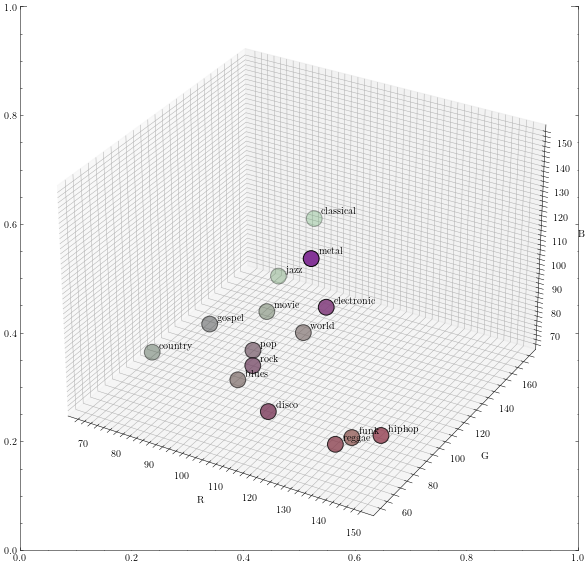

In [22]:
import matplotlib.colors 
import matplotlib.ticker
import matplotlib.pyplot as plt
import random

x = [x*255 for x in list(color_rgb['r'])]
y = [y*255 for y in list(color_rgb['g'])]
z = [z*255 for z in list(color_rgb['b'])]

color = [(x[i]/255, y[i]/255, z[i]/255) for i in range(len(x))]


fig = plt.figure()

plt.style.use(['science'])
fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax = fig.add_subplot(111,projection='3d')
# plt.set_cmap(plt.get_cmap("seismic", 100))

im = ax.scatter(x, y, z, s=1000, c=color, marker='.', edgecolors=['black'])

labels = list(color_rgb['genre'])

for i in range(len(x)):
    ax.text(x[i]+1.5,y[i]+1.5,z[i]+1.5, labels[i])

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

# plt.show()
plt.savefig("3d.png", dpi=600, bbox_inches='tight')


<Figure size 252x189 with 0 Axes>

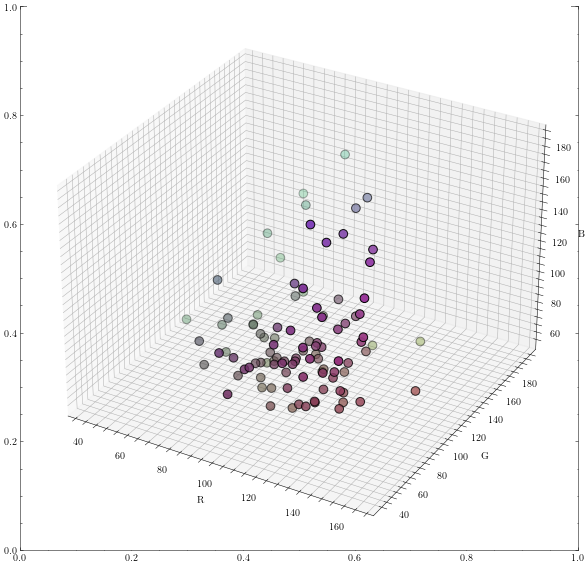

In [23]:
color_rgb = pd.read_csv('color_rgb.csv')

import matplotlib.colors 
import matplotlib.ticker
import matplotlib.pyplot as plt
import random

x = [x*255 for x in list(color_rgb['r'])]
y = [y*255 for y in list(color_rgb['g'])]
z = [z*255 for z in list(color_rgb['b'])]

color = [(x[i]/255, y[i]/255, z[i]/255) for i in range(len(x))]


fig = plt.figure()

plt.style.use(['science'])
fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax = fig.add_subplot(111,projection='3d')
# plt.set_cmap(plt.get_cmap("seismic", 100))

im = ax.scatter(x, y, z, s=300, c=color, marker='.', edgecolors=['black'])

# labels = list(color_rgb['sub_genre'])

# for i in range(len(x)):
#     ax.text(x[i]+1,y[i]+1,z[i]+1, labels[i])

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

# plt.show()
plt.savefig("3d_subgenre.png", dpi=600, bbox_inches='tight')


<Figure size 252x189 with 0 Axes>

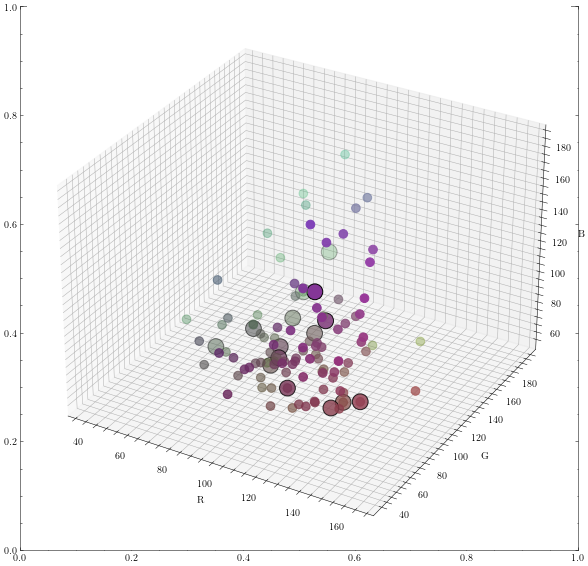

In [25]:
color_rgb = pd.read_csv('color_rgb.csv')
color_rgb_genre = pd.read_csv('color_rgb_genre.csv')

import matplotlib.colors 
import matplotlib.ticker
import matplotlib.pyplot as plt
import random

x = [x*255 for x in list(color_rgb['r'])]
y = [y*255 for y in list(color_rgb['g'])]
z = [z*255 for z in list(color_rgb['b'])]

x_g = [x*255 for x in list(color_rgb_genre['r'])]
y_g = [y*255 for y in list(color_rgb_genre['g'])]
z_g = [z*255 for z in list(color_rgb_genre['b'])]

color = [(x[i]/255, y[i]/255, z[i]/255) for i in range(len(x))]

color_g = [(x_g[i]/255, y_g[i]/255, z_g[i]/255) for i in range(len(x_g))]


fig = plt.figure()

plt.style.use(['science'])
fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax = fig.add_subplot(111,projection='3d')
# plt.set_cmap(plt.get_cmap("seismic", 100))

ax.scatter(x, y, z, s=300, c=color, marker='.')
ax.scatter(x_g, y_g, z_g, s=1000, c=color_g, marker='.', edgecolors=['black'])

# labels = list(color_rgb['sub_genre'])

# for i in range(len(x)):
#     ax.text(x[i]+1,y[i]+1,z[i]+1, labels[i])

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

# plt.show()
plt.savefig("3d_subgenre_genre.png", dpi=600, bbox_inches='tight')